In [ ]:
# Application SA Heart

import random as rd
import numpy as np
import pandas as pd
import math
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [ ]:
tab=pd.read_csv("SAheart.txt", delimiter=",")
np.shape(tab)
tab

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
Y = tab["chd"]
Xnum = tab.loc[:,['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
X=Xnum.to_numpy()

In [ ]:
# Dividing the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# DecisionTree, Bagging, random forest, adboost and gradient boosting model
model_1 = DecisionTreeClassifier()
model_2 = BaggingClassifier()
model_3 = RandomForestClassifier()
model_4 = AdaBoostClassifier(n_estimators=100, random_state=0)
model_5 = GradientBoostingClassifier(random_state=0)

In [ ]:
# Number of folds for k-fold cross-validation
k_folds = 5

# Create a KFold object for cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=1)

# Define the metrics to evaluate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Loop over the models
for model in [model_1, model_2, model_3, model_4, model_5]:
    # Perform cross-validation and obtain scores
    scores = cross_validate(model, X, Y, cv=kfold, scoring=scoring)

    # Display the results for each model
    print(f"Metrics for {model.__class__.__name__}:")
    print(f"Accuracy: {scores['test_accuracy'].mean()}")
    print(f"Precision: {scores['test_precision'].mean()}")
    print(f"Recall: {scores['test_recall'].mean()}")
    print(f"F1-score: {scores['test_f1'].mean()}")
    print("\n")

Metrics for DecisionTreeClassifier:
Accuracy: 0.6254558204768583
Precision: 0.6387955638751015
Recall: 0.6254558204768583
F1-score: 0.6304299055645699


Metrics for BaggingClassifier:
Accuracy: 0.6600514258999532
Precision: 0.6454808160480366
Recall: 0.6600514258999532
F1-score: 0.6445120196804581


Metrics for RandomForestClassifier:
Accuracy: 0.6708742402992052
Precision: 0.657911608670133
Recall: 0.6708742402992052
F1-score: 0.6589767087214684


Metrics for AdaBoostClassifier:
Accuracy: 0.658017765310893
Precision: 0.6512355111837931
Recall: 0.658017765310893
F1-score: 0.6535675525373346


Metrics for GradientBoostingClassifier:
Accuracy: 0.6687938288920056
Precision: 0.6595984340641505
Recall: 0.6687938288920056
F1-score: 0.6616927734835867




**Accuracy:**

- RandomForestClassifier achieved the highest accuracy (0.671), indicating that it correctly predicted the class labels more often than the other models in the test set.
- BaggingClassifier and GradientBoostingClassifier also performed well, with accuracies of 0.660 and 0.669, respectively.
- DecisionTreeClassifier and AdaBoostClassifier had slightly lower accuracies at 0.625 and 0.658, respectively.

**Precision:**

- RandomForestClassifier had the highest precision (0.658), suggesting that it had fewer false positives among its positive predictions.
- BaggingClassifier, GradientBoostingClassifier, and AdaBoostClassifier also demonstrated good precision, ranging between 0.645 and 0.660.
- DecisionTreeClassifier had the lowest precision at 0.639.

**Recall:**

- RandomForestClassifier achieved the highest recall (0.671), indicating that it captured a higher proportion of true positives among all actual positive instances.
- BaggingClassifier and GradientBoostingClassifier also performed well, with recalls of 0.660 and 0.669, respectively.
- DecisionTreeClassifier and AdaBoostClassifier had slightly lower recalls at 0.625 and 0.658, respectively.

**F1-score:**

- RandomForestClassifier had the highest F1-score (0.659), which balances precision and recall.
- BaggingClassifier, GradientBoostingClassifier, and AdaBoostClassifier also showed good F1-scores, ranging between 0.644 and 0.662.
- DecisionTreeClassifier had the lowest F1-score at 0.630.

RandomForestClassifier generally performed well across all metrics.

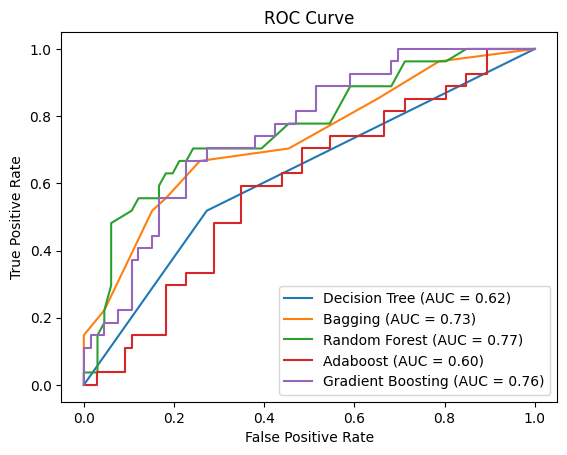

In [ ]:
def plot_roc_curve(model, X_test, Y_test, label):
    # Predict probabilities
    Y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Train the models
model_1.fit(X_train, Y_train)
model_2.fit(X_train, Y_train)
model_3.fit(X_train, Y_train)
model_4.fit(X_train, Y_train)
model_5.fit(X_train, Y_train)

plot_roc_curve(model_1, X_test, Y_test, 'Decision Tree')
plot_roc_curve(model_2, X_test, Y_test, 'Bagging')
plot_roc_curve(model_3, X_test, Y_test, 'Random Forest')
plot_roc_curve(model_4, X_test, Y_test, 'Adaboost')
plot_roc_curve(model_5, X_test, Y_test, 'Gradient Boosting')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Show legend
plt.legend()

# Display the plot
plt.show()

- The random forest, the gradient boosting and the bagging models have the best AUC

- The bagging and the gradient boosting models have a nice ROC curve

- The decision tree and the adboost ROC curves are below the other ROC curves, we can say the both perform less than the other models